In [305]:
import pandas as pd
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import random
import numpy as np

In [306]:
df = pd.read_csv('./ionosphere.csv')
X = df.iloc[:,2:-1]
Y = df.iloc[:,-1]
Target = []
for elem in Y:
    if elem == 'b':
        Target.append([0])
    else:
        Target.append([1])
X

,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.0376,0.85243.1,-0.17755,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.3409,0.42267,-0.54487,0.18641,-0.453
0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
2,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
3,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
4,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,-0.06302,...,0.03513,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
346,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
347,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
348,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [307]:
function_set = {'+','-','*', '/'}

In [308]:
L = ["x"+str(i) for i in range(1,33,1)]
terminal_set = set(L)
# Here the terminal_set havent add the R between [0,10], but generate 0.5 for class attribute and 0.5 for random int

In [309]:
# Generate initial population
import random
class Node:
    def __init__(self, value):
        self.val = value
        self.left = None
        self.right = None

# In-order traversal of tree
def inorder(cur):
    if not cur:
        return []
    else:
        return inorder(cur.left) + [cur.val] + inorder(cur.right)

# Create a random tree structure for initial population
def create(k):
    if k == 0:
        return None
    decide = random.randint(0,1)
    cur = None
    if decide % 2 == 0:   #If even number, generate a terminal
        terminal_prob = random.randint(0,1)
        if terminal_prob % 2 == 0:
            cur = Node(random.random())
        else:
            l = list(terminal_set)
            index = random.randint(0,len(l)-1)
            cur = Node(l[index])
    else:   #If odd number, generate a function
        l = list(function_set)
        index = random.randint(0,len(l)-1)
        cur = Node(l[index])
        cur.left = create(k-1)
        cur.right = create(k-1)
    return cur

# Valid the tree structure
def isValid(cur):
    for index in range(len(cur)):
        if index == 0 and cur[0] in function_set:
            return False
        elif index == len(cur)-1 and cur[index] in function_set:
            return False
        elif cur[index] in function_set and (cur[index+1] in function_set or cur[index-1] in function_set):
            return False
    return True

# Generate n initial population
def generate(n):
    root = []
    res = []
    while len(root) < n:
        temp = create(random.randint(1,34))
        t = inorder(temp)
        if isValid(t):
            res.append(t)
            root.append(temp)
    return res,root

In [310]:
from math import *
# Evaluate the arithmetic expression
def evaluate(cur):
    temp = []
    for elem in cur:
        temp.append(str(elem))
    temp = "".join(temp)
    #print(temp)
    return eval(temp)

In [311]:
# Store all those in-order travsel representation, root and calculate the corresponding fitness
def updatePopulation(population,Root):
    Root_dic = dict()
    Population_dic = dict()
    for loc,people in enumerate(population):
        count = 0
        Total = 0
        for index, row in df.iterrows():
            Total += 1
            cur = []
            for i in range(len(people)):
                if people[i] in terminal_set:
                    col_index= int(people[i][1:])
                    val = row[col_index]
                    if val == 0:
                        val = 0.00001
                    cur.append(val)
                else:
                    cur.append(people[i])
            predict = evaluate(cur)
            if predict < 0 and Target[index][0] == 0:
                count+= 1
            elif predict >= 0 and Target[index][0] == 1:
                count+= 1
            
        Root_dic[tuple(people)] = Root[loc]
        Population_dic[tuple(people)] = count / float(Total)
    
    return Root_dic, Population_dic
    

In [312]:
# Perform the mutation operator, select node at random height, change to a random value based on the set its in
def mutation(rootPopulation:dict(),stringPopulation:dict()):
    literal = []
    root = []
    fitness = []
    for k, v in rootPopulation.items():
        literal.append(k)
        root.append(v)
        fitness.append(stringPopulation[k])
    index = random.randint(0,len(fitness)-1)
    
    to_change = root[index]
    level = random.randint(0,10)
    #print(len(literal),len(root),len(fitness))
    #print(root[index])
    def modification(cur,depth):
        if cur.left == None and cur.right == None:
            terminal_prob = random.randint(0,1)
            if terminal_prob % 2 == 0:
                cur.val = random.random()
            else:
                l = list(terminal_set)
                index = random.randint(0,len(l)-1)
                cur.val = l[index]
        elif depth > 0:
            direction = random.randint(0,1)
            if direction % 2 == 0 and cur.left:
                modification(cur.left, depth-1)
            elif direction % 2 == 1 and cur.right:
                modification(cur.right, depth-1)
            elif cur.left and not cur.right:
                modification(cur.left,depth-1)
            elif cur.right and not cur.left:
                modification(cur.right,depth-1)
        elif depth == 0:
            if cur.val in function_set:
                l = list(function_set)
                index = random.randint(0,len(l)-1)
                while l[index] == cur.val:
                    index = random.randint(0,len(l)-1)
                cur.val = l[index]
            else:
                terminal_prob = random.randint(0,1)
                if terminal_prob % 2 == 0:
                    cur.val = random.random()
                else:
                    l = list(terminal_set)
                    index = random.randint(0,len(l)-1)
                    cur.val = l[index]
    
    #print(inorder(to_change))
    modification(to_change,level)
    #print(inorder(to_change))
    return inorder(to_change), to_change

In [313]:
# Perform the crossover operator, seclct 2 random parents, and make sure the node being swapped has same type of value
def crossover(rootPopulation:dict(),stringPopulation:dict()):
    literal = []
    root = []
    fitness = []
    for k, v in rootPopulation.items():
        literal.append(k)
        root.append(v)
        fitness.append(stringPopulation[k])
    # print(root)
    # print(len(fitness))
    index1 = random.randint(0,len(fitness)-1)
    index2 = random.randint(0,len(fitness)-1)
    while index2 == index1:
        index2 = random.randint(0,len(fitness)-1)
    
    # test
    # index1, index2 = 0, 3
    parent1 = root[index1]
    parent2 = root[index2]
    
    def modification(parent1, parent2):
        if parent1.val in function_set and parent2.val in function_set:
            chance = random.randint(0,1)
            if chance == 0:
                t = parent1.left
                parent1.left = parent2.left
                parent2.left = t
            else:
                t = parent1.right
                parent1.right = parent2.right
                parent2.right = t
            return
        elif parent1.val not in function_set and parent2.val not in function_set:
            chance = random.randint(0,1)
            if chance == 0:
                t = parent1.left
                parent1.left = parent2.left
                parent2.left = t
            else:
                t = parent1.right
                parent1.right = parent2.right
                parent2.right = t
            return
        elif parent1.val in function_set:
            if parent1.left:
                modification(parent1.left,parent2)
            else:
                modification(parent1.right,parent2)
        elif parent2.val in function_set:
            if parent2.left:
                modification(parent1,parent2.left)
            else:
                modification(parent1,parent2.right)
        
    
    modification(parent1, parent2)
    st1 = inorder(parent1)
    st2 = inorder(parent2)
    r1 = parent1
    r2 = parent2
    return st1,st2,r1,r2

In [314]:
# The overall breeding process for generating the population for next generation with assigning reproduction, crossover
# and mutation with different probability
def breeding(rootPopulation, stringPopulation):
    p_next = 0
    stringRep = []
    rootRep = []
    while p_next < 50:
        operator = random.randint(1,10)
        if operator <= 2 :
            Str, root = generate(1)
            for index in range(len(root)):
                stringRep.append(Str[index])
                rootRep.append(root[index])
            p_next += 1
        if 2 < operator <= 6 :
            s1,s2,r1,r2 = crossover(rootPopulation,stringPopulation)
            stringRep.append(s1)
            rootRep.append(r1)
            stringRep.append(s2)
            rootRep.append(r2)
            p_next += 2
        if 7 < operator  <= 10:
            Str, root = mutation(rootPopulation,stringPopulation)
            stringRep.append(Str)
            rootRep.append(root)
            p_next += 1
    return stringRep, rootRep
    

In [301]:
# Initial 50 population
population, Root = generate(50)
# Update the population, like get the fitness and root node for each population
rootPopulation, stringPopulation = updatePopulation(population,Root)
# Best solution
p_best_score = 0
p_best = ""
generation = 0
history = []
# print(rootPopulation, stringPopulation)
while generation < 2000 and p_best_score < 0.85:
    generation += 1
    stringRepresentation, root = breeding(rootPopulation, stringPopulation)
    #print(stringRepresentation, root, "from line 13")
    r_p, s_p = updatePopulation(stringRepresentation, root)
    for k, v in s_p.items():
        if v > p_best_score:
            p_best = k
            p_best_score = v
    rootPopulation, stringPopulation = r_p, s_p
    print(p_best_score, generation)
    history.append(p_best_score)
        

0.7142857142857143 1
0.7171428571428572 2
0.7171428571428572 3
0.7171428571428572 4
0.7171428571428572 5
0.7171428571428572 6
0.7171428571428572 7
0.7171428571428572 8
0.7171428571428572 9
0.7171428571428572 10
0.7171428571428572 11
0.7171428571428572 12
0.7171428571428572 13
0.7171428571428572 14
0.7171428571428572 15
0.7171428571428572 16
0.7171428571428572 17
0.7171428571428572 18
0.7171428571428572 19
0.7171428571428572 20
0.7257142857142858 21
0.7285714285714285 22
0.7285714285714285 23
0.7285714285714285 24
0.7285714285714285 25
0.7285714285714285 26
0.7285714285714285 27
0.7285714285714285 28
0.7285714285714285 29
0.7285714285714285 30
0.7457142857142857 31
0.7457142857142857 32
0.8028571428571428 33
0.8028571428571428 34
0.8028571428571428 35
0.8028571428571428 36
0.8028571428571428 37
0.8028571428571428 38
0.8028571428571428 39
0.8028571428571428 40
0.8028571428571428 41
0.8028571428571428 42
0.8028571428571428 43
0.8028571428571428 44
0.8028571428571428 45
0.8028571428571428 

0.84 706
0.84 707
0.84 708
0.84 709
0.84 710
0.84 711
0.84 712
0.84 713
0.84 714
0.84 715
0.84 716
0.84 717
0.84 718
0.84 719
0.84 720
0.84 721
0.84 722
0.84 723
0.84 724
0.84 725
0.84 726
0.84 727
0.84 728
0.84 729
0.84 730
0.84 731
0.84 732
0.84 733
0.84 734
0.84 735
0.84 736
0.84 737
0.84 738
0.84 739
0.84 740
0.84 741
0.84 742
0.84 743
0.84 744
0.84 745
0.84 746
0.84 747
0.84 748
0.84 749
0.84 750
0.84 751
0.84 752
0.84 753
0.84 754
0.84 755
0.84 756
0.84 757
0.84 758
0.84 759
0.84 760
0.84 761
0.84 762
0.84 763
0.84 764
0.84 765
0.84 766
0.84 767
0.84 768
0.84 769
0.84 770
0.84 771
0.84 772
0.84 773
0.84 774
0.84 775
0.84 776
0.84 777
0.84 778
0.84 779
0.84 780
0.84 781
0.84 782
0.84 783
0.84 784
0.84 785
0.84 786
0.84 787
0.84 788
0.84 789
0.84 790
0.84 791
0.84 792
0.84 793
0.84 794
0.84 795
0.84 796
0.84 797
0.84 798
0.84 799
0.84 800
0.84 801
0.84 802
0.84 803
0.84 804
0.84 805
0.84 806
0.84 807
0.84 808
0.84 809
0.84 810
0.84 811
0.84 812
0.84 813
0.84 814
0.84 815
0.84 816
0

0.84 1555
0.84 1556
0.84 1557
0.84 1558
0.84 1559
0.84 1560
0.84 1561
0.84 1562
0.84 1563
0.84 1564
0.84 1565
0.84 1566
0.84 1567
0.84 1568
0.84 1569
0.84 1570
0.84 1571
0.84 1572
0.84 1573
0.84 1574
0.84 1575
0.84 1576
0.84 1577
0.84 1578
0.84 1579
0.84 1580
0.84 1581
0.84 1582
0.84 1583
0.84 1584
0.84 1585
0.84 1586
0.84 1587
0.84 1588
0.84 1589
0.84 1590
0.84 1591
0.84 1592
0.84 1593
0.84 1594
0.84 1595
0.84 1596
0.84 1597
0.84 1598
0.84 1599
0.84 1600
0.84 1601
0.84 1602
0.84 1603
0.84 1604
0.84 1605
0.84 1606
0.84 1607
0.84 1608
0.84 1609
0.84 1610
0.84 1611
0.84 1612
0.84 1613
0.84 1614
0.84 1615
0.84 1616
0.84 1617
0.84 1618
0.84 1619
0.84 1620
0.84 1621
0.84 1622
0.84 1623
0.84 1624
0.84 1625
0.84 1626
0.84 1627
0.84 1628
0.84 1629
0.84 1630
0.84 1631
0.84 1632
0.84 1633
0.84 1634
0.84 1635
0.84 1636
0.84 1637
0.84 1638
0.84 1639
0.84 1640
0.84 1641
0.84 1642
0.84 1643
0.84 1644
0.84 1645
0.84 1646
0.84 1647
0.84 1648
0.84 1649
0.84 1650
0.84 1651
0.84 1652
0.84 1653
0.84 1654


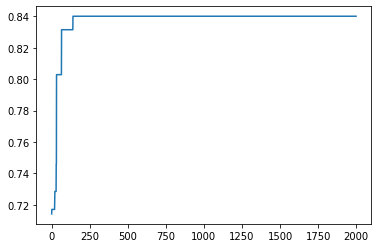

In [302]:
plt.plot(history)

In [303]:
print(p_best)

('x4', '+', 'x30', '*', 'x26', '-', 0.40125837725151936, '-', 0.0709700615874378)


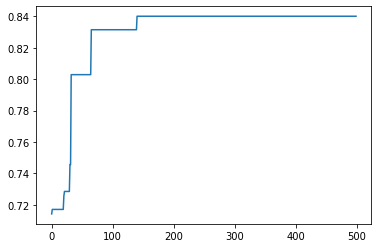

In [304]:
plt.plot(history[:500])